# Final Project Notebook

### NOTE: If you build and run a notebook in the cloud, just copy it down in place of this one!  
#### Be sure to have all your output captured within the notebook!
#### <span style="background:yellow">Be sure to save your work early and often!</span>

![Specific_Project_1.png MISSING](../images/Specific_Project_1.png)

# Add code as needed in the cells below to produce your analytical products

For my project, I plan to look at the subreddit /r/unpopularopinion and see what kind of topics/opinions are commonly brought up. Are there 'popular' unpopular opinions that are posted?

## List of packages you must "pip install" on the console in order to run below

google

In [ ]:
## Include whichever API are appropriate for your cloud provider

#----------------------------Reddit RSS Feed----------------------------------------
# For my project, I will run the RSS feed on the subreddit 
# r/unpopularopinion/
#-----------------------------------------------------------------------------------

import os
from google.cloud import storage
## Change to your own project name
PROJECT='lcmhng-mu-dsa'

def list_blobs(bucket_name):
    """Lists all the blobs in the bucket."""
    storage_client = storage.Client(project=PROJECT)
    bucket = storage_client.get_bucket(bucket_name)

    blobs = bucket.list_blobs()

    for blob in blobs:
        print(blob.name)

def list_blobs_with_prefix(bucket_name, prefix, delimiter=None):
    """Lists all the blobs in the bucket that begin with the prefix.
    This can be used to list all blobs in a "folder", e.g. "public/".
    The delimiter argument can be used to restrict the results to only the
    "files" in the given "folder". Without the delimiter, the entire tree under
    the prefix is returned. For example, given these blobs:
        /a/1.txt
        /a/b/2.txt
    If you just specify prefix = '/a', you'll get back:
        /a/1.txt
        /a/b/2.txt
    However, if you specify prefix='/a' and delimiter='/', you'll get back:
        /a/1.txt
    """
    storage_client = storage.Client(project=PROJECT)
    bucket = storage_client.get_bucket(bucket_name)

    blobs = bucket.list_blobs(prefix=prefix, delimiter=delimiter)

    print('Blobs:')
    for blob in blobs:
        print(blob.name)

    if delimiter:
        print('Prefixes:')
        for prefix in blobs.prefixes:
            print(prefix)

#------------------------------------------------------------------------UPLOAD----------------------------

def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client(project=PROJECT)
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print('File {} uploaded to {}.'.format(
        source_file_name,
        destination_blob_name))


def upload_as_blob(bucket_name, source_data, destination_blob_name, content_type='text/plain'):
    """Uploads a file to the bucket."""
    storage_client = storage.Client(project=PROJECT)
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    #blob.upload_from_filename(source_file_name)
    blob.upload_from_string(source_data, content_type=content_type)
    
    print('Data uploaded to {}.'.format(destination_blob_name))

def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    storage_client = storage.Client(project=PROJECT)
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(source_blob_name)

    blob.download_to_filename(destination_file_name)

    print('Blob {} downloaded to {}.'.format(
        source_blob_name,
        destination_file_name))


def delete_blob(bucket_name, blob_name):
    """Deletes a blob from the bucket."""
    storage_client = storage.Client(project=PROJECT)
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(blob_name)

    blob.delete()

    print('Blob {} deleted.'.format(blob_name))

#-------------------------RUNTIME CODE

# Bucket Name:
#my_bucket_name = 'dsa_mini_project_lcmhng'
my_bucket_name = 'dsa_project_lcmhng'

list_blobs(my_bucket_name)

#------------------------------Update with REDDIT download

def read_blob(bucket_name, source_blob_name):
    """Downloads a blob from the bucket and returns content in bytearray"""
    storage_client = storage.Client(project=PROJECT)
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    return blobdownload_as_string()

def read_blob_as_string(bucket_name, source_blob_name):
    """Downloads a blob from the bucket and returns content in string"""
    storage_client = storage.Client(project=PROJECT)
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(source_blob_name)
    return blob.download_as_string().decode("utf-8") 

#-----------------------------------CODE TO GRAB AND STORE REDDIT DATA

import feedparser
from bs4 import BeautifulSoup
from bs4.element import Comment
import pandas as pd
import numpy as np

# Functions from: https://stackoverflow.com/questions/1936466/beautifulsoup-grab-visible-webpage-text

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

# Define URL of the RSS Feed I want
# Here we will update to the specific subreddit of choice r/unpopularopinion/

a_reddit_rss_url = 'http://www.reddit.com/r/unpopularopinion/.rss?sort=new'

feed = feedparser.parse( a_reddit_rss_url )

"""
if (feed['bozo'] == 1):
    print("Error Reading/Parsing Feed XML Data")    
else:
    for item in feed[ "items" ]:
        dttm = item[ "date" ]
        title = item[ "title" ]
        summary_text = text_from_html(item[ "summary" ])
        link = item[ "link" ]
        
        print("====================")
        print("Title: {} ({})\nTimestamp: {}".format(title,link,dttm))
        print("--------------------\nSummary:\n{}".format(summary_text))
   
"""
              
# ------------ Create file string
"""         
def reddit_post_string(feed):
"""
    #Funciton to generate text for JSON file from reddit rss
"""    
    
    file_str = ""
              
    if (feed['bozo'] == 1):
        print("Error Reading/Parsing Feed XML Data")    
    else:
        for item in feed[ "items" ]:
            dttm = item[ "date" ]
            title = item[ "title" ]
            summary_text = text_from_html(item[ "summary" ])
            link = item[ "link" ]
        
            file_str += "====================\n"
            file_str += "Title: {} ({})\nTimestamp: {}\n".format(title,link,dttm)
            file_str += "--------------------\nSummary:\n{}".format(summary_text)

    return file_str
"""
#---------------------------------------Creating a file name------------------

import time
timestr = time.strftime("%Y%m%d-%H%M%S")
print(timestr)

file_name = "reddit-unpop-rss-" + timestr + ".txt"
## print(file_name)
#reddit_thread_string = reddit_post_string(feed)

# I actually should not need this code---------------------------------------------------------------
# unpop_df = pd.DataFrame.from_dict(feed["items"])
# Instead we should just be able to upload the scraped feed as is which would save as JSON

#upload_as_blob(my_bucket_name, reddit_thread_string, file_name)
# THIS IS ANOTHER OLDER VERSION SAVING THE DATAFRAME -------------> upload_as_blob(my_bucket_name, unpop_df, file_name)
upload_as_blob(my_bucket_name, feed, file_name)

# list_blobs(my_bucket_name)


In [7]:
# Now that we have data loaded to blob, we can continue with rest of project

In [3]:
# Code to download the blob as a string and turn it in to a list of items for later use

blob_list = []

for blob_item in list_blobs(my_bucket_name):
    blob_list.append(read_blob_as_string(my_bucket_name, blob_item))

new_sum_list = []
    
for blob in blob_list:
    for item in blob["items"]:
        new_sum_list.append(text_from_html(item["summary"]))
    
    
#---------------Saving below for reference-------------
    
sum_list = []

for item in feed["items"]:
    sum_list.append(text_from_html(item["summary"]))


In [6]:
# Imports the Google Cloud client library
from google.cloud import language_v1
from google.cloud import language
from google.oauth2 import service_account

# Key is saved in this folder and was uploaded to the cloud shell 
creds=service_account.Credentials.from_service_account_file('umc-dsa-8420-fs2021-82e06d434dd0.json')

# Instantiates a client
client = language_v1.LanguageServiceClient(credentials=creds,)


# The text to analyze
text = u"Hello, world!"
document = language_v1.Document(
    content=text, type_=language_v1.Document.Type.PLAIN_TEXT
)

# Detects the sentiment of the text
sentiment = client.analyze_sentiment(
    request={"document": document}
).document_sentiment

print("Text: {}".format(text))
print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))




Text: Hello, world!
Sentiment: 0.6000000238418579, 0.6000000238418579


In [16]:
# Imports the Google Cloud client library
from google.cloud import language_v1
from google.cloud import language
from google.oauth2 import service_account

# Key is saved in this folder and was uploaded to the cloud shell 
creds=service_account.Credentials.from_service_account_file('umc-dsa-8420-fs2021-82e06d434dd0.json')

# Instantiates a client
client = language_v1.LanguageServiceClient(credentials=creds,)

def sentiment_dict(text_list):
    
    text_vector = []
    sentiment_score = []
    sentiment_mag = []
    text_dict = {}
    
    for item in text_list:
        document = language_v1.Document(
            content=item, type_=language_v1.Document.Type.PLAIN_TEXT
            )

        # Detects the sentiment of the text
        sentiment = client.analyze_sentiment(
            request={"document": document}
            ).document_sentiment

        #print("Text: {}".format(item))
        #print("Sentiment: {}, {}".format(sentiment.score, sentiment.magnitude))
        
        text_vector.append(item)
        sentiment_score.append(sentiment.score)
        sentiment_mag.append(sentiment.magnitude)
    
    text_dict['text'] = text_vector
    text_dict['sentiment_score'] = sentiment_score
    text_dict['sentiment_magnitude'] = sentiment_mag
    
    return text_dict

In [17]:
sentiment_dictionary = sentiment_dict(sum_list)

In [18]:
unpop_df = pd.DataFrame.from_dict(sentiment_dictionary)

unpop_df.head()

,text,sentiment_score,sentiment_magnitude
0,"Greetings, you opinionated, unpopular lot! Thi...",0.0,1.6
1,"Going to be quick and concise about this, cudd...",-0.6,4.1
2,You paid over $1k to be a walking billboard fo...,-0.4,3.6
3,It's so annoying. I have a 1.5 year old labrad...,-0.5,4.8
4,"What I meant by that , is testing their patien...",-0.4,1.4


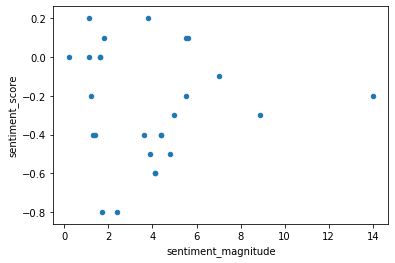

In [24]:
unpop_df.plot.scatter('sentiment_magnitude', 'sentiment_score')


## Preparing your submission

### Deliverables: 
   1. This or a replacement Notebook
   1. An aggregateion of data in tabular format that conveyes something interesting about the Reddit RSS feed during your scraping.
     * The table can be embedded or uploaded into this folder (CSV or Excel)
   1. One or more data visualizations

Imbed your image into this page by saving your data visualization as: `FINAL_PROJECT_IMAGE.png`  
Upload it to the `module8/exercises/` folder.

If you need to, change the file type to `.jpg` or `.jpeg` or ... whatever, then update the link in this cell (double click to edit).  
Then re-run this markdown cell to see it.

![FINAL_PROJECT_IMAGE.png MISSING](./exercises/FINAL_PROJECT_IMAGE.png)

---
## Summarize in the fields below
 1. Describe the overall process and components you used for the project.
 2. What is the key insight from the tabularization?
 3. What is the key insight from the visualization?


# Save your Notebook!